# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [322]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [323]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    if f(x0) == 0:
        return x0, 0
    xp = x0
    xn = xp - f(xp) / fder(xp)
    i = 1
    while abs(xp - xn) > eps and i <= maxiter:
        xp = xn
        xn = xp - f(xp) / fder(xp)
        i+=1
    return xn, i 

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [324]:
def f(x):
    return x**2-1
def fder(x):
    return 2*x

for i in range(10,100,20): #различные значения начального приближения
    print('x0 (левый) =',-i) #слева начальное приближение
    x1, n1 = newton_iteration(f, fder, -i)
    print('x1= %.5f,'% (x1),'iter: ',n1)
    print('x0 (правый) =',i) #справа начальное приближение
    x2, n2 = newton_iteration(f, fder, i)
    print('x2= %.5f,'% (x2),'iter: ',n2)
    print('__________________________________________________________________')

x0 (левый) = -10
x1= -1.00000, iter:  7
x0 (правый) = 10
x2= 1.00000, iter:  7
__________________________________________________________________
x0 (левый) = -30
x1= -1.00000, iter:  9
x0 (правый) = 30
x2= 1.00000, iter:  9
__________________________________________________________________
x0 (левый) = -50
x1= -1.00000, iter:  10
x0 (правый) = 50
x2= 1.00000, iter:  10
__________________________________________________________________
x0 (левый) = -70
x1= -1.00000, iter:  10
x0 (правый) = 70
x2= 1.00000, iter:  10
__________________________________________________________________
x0 (левый) = -90
x1= -1.00000, iter:  11
x0 (правый) = 90
x2= 1.00000, iter:  11
__________________________________________________________________


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [325]:
def mod_newton_iteration(f, fder, m, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    m : integer
        Integer constant for modification of Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    if f(x0) == 0:
        return x0, 0
    xp = x0
    xn = xp - m * f(xp) / fder(xp)
    i = 1
    while abs(xp - xn) > eps and i <= maxiter:
        xp = xn
        xn = xp - m * f(xp) / fder(xp)
        i+=1
    return xn, i 

In [326]:
def f1(x):
    return (x**2-1)**2
def fder1(x):
    return 4*x*(x**2-1)

for i in range(10,40,10): #разные значения начального приближения
    print('________________________________________________________________________________ ')
    print('x0 (левое и правое значение) = +- ',i) #начальное приближение
    for j in range(1, 6):
        print('m =', j)
        x1, n1 = mod_newton_iteration(f1, fder1, j, -i)
        print('x1= %.5f,'% (x1),'iter: ',n1)
        x2, n2 = mod_newton_iteration(f1, fder1, j, i)
        print('x2= %.5f,'% (x2),'iter: ',n2)
        print(' ')

________________________________________________________________________________ 
x0 (левое и правое значение) = +-  10
m = 1
x1= -1.00001, iter:  24
x2= 1.00001, iter:  24
 
m = 2
x1= -1.00000, iter:  7
x2= 1.00000, iter:  7
 
m = 3
x1= -1.00000, iter:  17
x2= 1.00000, iter:  17
 
m = 4
x1= -0.10000, iter:  1001
x2= 0.10000, iter:  1001
 
m = 5
x1= -2.14898, iter:  1001
x2= 2.14898, iter:  1001
 
________________________________________________________________________________ 
x0 (левое и правое значение) = +-  20
m = 1
x1= -1.00001, iter:  27
x2= 1.00001, iter:  27
 
m = 2
x1= -1.00000, iter:  8
x2= 1.00000, iter:  8
 
m = 3
x1= -1.00000, iter:  19
x2= 1.00000, iter:  19
 
m = 4
x1= -0.05000, iter:  1001
x2= 0.05000, iter:  1001
 
m = 5
x1= -2.06657, iter:  1001
x2= 2.06657, iter:  1001
 
________________________________________________________________________________ 
x0 (левое и правое значение) = +-  30
m = 1
x1= -1.00001, iter:  28
x2= 1.00001, iter:  28
 
m = 2
x1= -1.00000, ite

Видно, что схождение осуществляется с квадратичной скоростью. При m=2 сходимость к корню осуществляется за наименьшее число итераций (7 такая же и в 1 методе для некратного корня), что соответсвует кратности корня нашего уравнения. Для m>=4 вообще корень не сходится.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

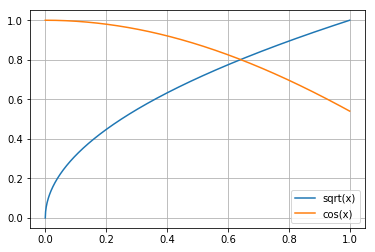

In [327]:
x = np.linspace(0, 1, 1000)
plt.plot(x, np.sqrt(x), label='sqrt(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.grid(True)
plt.legend()

Из графика видно, что корень лежит между 0.6 и 0.7, возьмем начальное приближение xo=0.6

In [328]:
def fixed_point_iteration(f, x0, a, eps=1e-5, maxiter=1000):
    if f(x0) == 0:
        return x0, 0
    xp = x0
    xn = xp - a * f(xp)
    i = 1
    while abs(xp - xn) > eps and i <= maxiter:
        xp = xn
        xn = xp - a * f(xp)
        i+=1
    return xn, i 

a оптимальное: 0.816,
минимальное кол-во итераций:  3.0
для a оптимальной: 
x = 0.64171, iter =  3


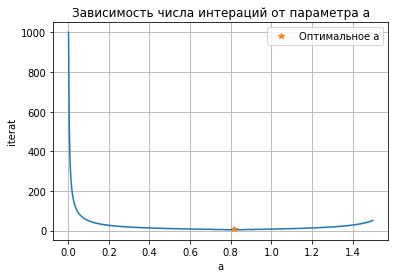

In [329]:
a = np.linspace(0, 1.5, 1000)
iterat = np.zeros(len(a))
j=0
def f(x):
    return x**0.5-np.cos(x)
for i in a:
    iterat[j] = fixed_point_iteration(f,0.6, i)[1]
    j = j+1
    
plt.plot(a[1:], iterat[1:])
a1 = 2/(1/2/math.sqrt(0.6)+math.sin(0.6)+1/2/math.sqrt(0.7)+math.sin(0.7))  #a=2/(m+M)
plt.plot(a1, fixed_point_iteration(f,-1, a1)[1], '*', label='Оптимальное a' )
plt.xlabel('а')
plt.ylabel('iterat')
plt.title('Зависимость числа интераций от параметра а')
plt.grid(True)
plt.legend()
print('a оптимальное: %.3f,' % (a1))
print('минимальное кол-во итераций: ',min(iterat[1:]))
x, n = fixed_point_iteration(f, 0.5, a1, eps=1e-5)
print('для a оптимальной: ')
print('x = %.5f,' % (x), 'iter = ', n)

Видно, что оптимальная сходимость к корню происходит за 3 итерации для значения a=2/(m+M) и полученного перебороб

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [330]:
import cmath

def f(x):
    return x**3 - 1
def fder(x):
    return 3 * x**2

def fractal(x0):
    x, n = newton_iteration(f, fder, x0, eps=1e-4, maxiter=10)
    y = [0,0,0]
    for k in (0,1,2):
        y[k] = abs(x - cmath.exp(1j * 2 * k * np.pi / 3))
    if min(y[0], y[1], y[2]) == y[0]:
        return 0
    if min(y[0], y[1], y[2]) == y[1]:
        return 1
    if min(y[0], y[1], y[2]) == y[2]:
        return 2

In [331]:
def pic(n, m): #размеры
    plt.figure()
    x = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if j != n // 2 or i != n // 2:
                x[j, i] = fractal(-m + i * 2 * m / n + (-m + j * 2 * m / n)*1j)
    plt.imshow(x, extent=[-m, m, -m, m])
    plt.xlabel('Re(x)')
    plt.ylabel('Im(x)')

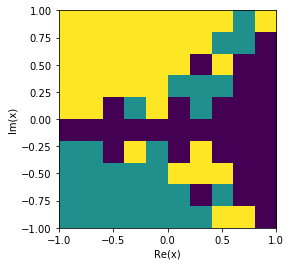

In [332]:
pic(10, 1)

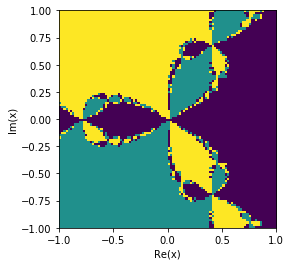

In [333]:
pic(100 , 1)

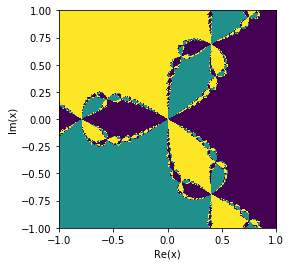

In [334]:
pic(1000, 1)

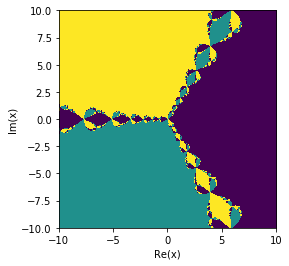

In [335]:
pic(1000, 10)

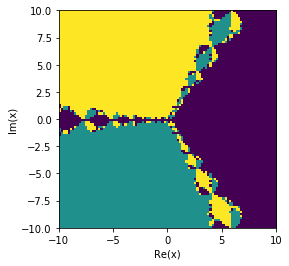

In [336]:
pic(100, 10)

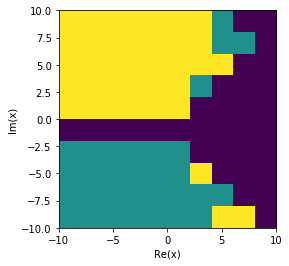

In [337]:
pic(10, 10)